# Box Office

Kaggle TMDB Box Office Prediction Competition 2019

Authors: Sean Trinh, Hariharan Vijayachandran

Part 1 - Process the data.

In [80]:
'''
    Process the data.
'''
import pandas as pd

train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')
train_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [81]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [82]:
to_drop = ['release_date','id','belongs_to_collection','genres','homepage','imdb_id','original_title','title','original_language','overview','poster_path','production_companies','production_countries','spoken_languages','status','tagline','Keywords','cast','crew']
for x in to_drop:
    train_df = train_df.drop(x,axis=1)
    if x!= 'revenue':
        test_df = test_df.drop(x,axis=1)

In [83]:
train_df.head()


,budget,popularity,runtime,revenue
0,14000000,6.575393,93.0,12314651
1,40000000,8.248895,113.0,95149435
2,3300000,64.299990,105.0,13092000
3,1200000,3.174936,122.0,16000000
4,0,1.148070,118.0,3923970


In [84]:
train=train_df.sample(frac=0.7,random_state=200)
test=train_df.drop(train.index)

In [85]:
print(len(train))

print(len(test))


2100
900


In [86]:
import numpy as np
train = train.apply(np.log)
def f(x):
    if x<0:
        return 0
    return x
train = train.applymap(f)
train = train.fillna(0)
X = train.drop('revenue',axis = 1)
Y = train['revenue']

test = test.apply(np.log)
test = test.applymap(f)
test = test.fillna(0)
X_test =test.drop('revenue',axis = 1)
Y_test = test['revenue']

train.head()

,budget,popularity,runtime,revenue
2585,0.000000,1.657191,4.418841,14.156419
2611,0.000000,2.818963,4.672829,18.251453
219,14.771022,0.790251,4.653960,14.967980
2204,17.504390,2.382268,4.691348,17.153756
251,18.400478,1.985746,4.779123,16.119826


In [87]:
from keras import models, layers, regularizers, optimizers
model=models.Sequential()
model.add(layers.Dense(356, activation='relu', input_shape=(X.shape[1],)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10,activation='relu'))
# model.add(layers.Dropout(0.1))
# model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer=optimizers.rmsprop(lr=1e-5),loss='mse'
,metrics=['mean_squared_logarithmic_error'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 356)               1424      
_________________________________________________________________
dropout_6 (Dropout)          (None, 356)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 256)               91392     
_________________________________________________________________
dense_45 (Dense)             (None, 10)                2570      
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 11        
Total params: 95,397
Trainable params: 95,397
Non-trainable params: 0
_________________________________________________________________


In [88]:
history=model.fit(X,Y,epochs=40,batch_size = 32, validation_data=(X_test, Y_test))

Train on 2100 samples, validate on 900 samples
Epoch 1/40
2100/2100 [==============================] - 1s 383us/step - loss: 210.0172 - mean_squared_logarithmic_error: 3.6836 - val_loss: 191.6418 - val_mean_squared_logarithmic_error: 2.9072
Epoch 2/40
2100/2100 [==============================] - 0s 75us/step - loss: 178.4591 - mean_squared_logarithmic_error: 2.5462 - val_loss: 160.4942 - val_mean_squared_logarithmic_error: 2.0571
Epoch 3/40
2100/2100 [==============================] - 0s 75us/step - loss: 148.3601 - mean_squared_logarithmic_error: 1.8317 - val_loss: 132.1980 - val_mean_squared_logarithmic_error: 1.5058
Epoch 4/40
2100/2100 [==============================] - 0s 71us/step - loss: 121.7883 - mean_squared_logarithmic_error: 1.3602 - val_loss: 107.1697 - val_mean_squared_logarithmic_error: 1.1295
Epoch 5/40
2100/2100 [==============================] - 0s 71us/step - loss: 97.9559 - mean_squared_logarithmic_error: 1.0317 - val_loss: 84.9744 - val_mean_squared_logarithmic_err

EVALUATE AND GRAPH

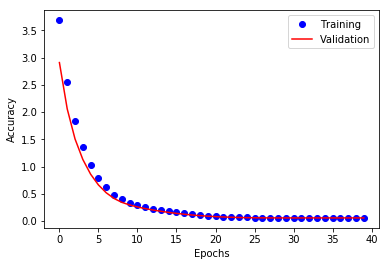

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['mean_squared_logarithmic_error']
val_acc = history.history['val_mean_squared_logarithmic_error']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training')
plt.plot(epochs, val_acc, 'r', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [94]:


test_df = test_df.apply(np.log)
test_df = test_df.applymap(f)
test_df = test_df.fillna(0)
result = model.predict(test_df)
result = np.exp(result)

output_df = pd.read_csv('./data/test.csv')
for x in to_drop:
    if x!= 'revenue'and x!='id':
        output_df = output_df.drop(x,axis=1)
output_df.drop('budget',axis=1, inplace = True)
output_df.drop('runtime',axis=1,inplace = True)
output_df.drop('popularity',axis=1,inplace = True)
output_df['revenue'] = result
output_df.to_csv("./submission.csv",index = False)